### Importing Dependancies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
import json
from scipy import stats
from config_joey import api_key

### Pulling Race Data

In [2]:
import requests

url = "https://api-formula-1.p.rapidapi.com/rankings/races"

querystring = {"race":"50"}

headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'get': 'rankings', 'parameters': {'race': '50'}, 'errors': [], 'results': 20, 'response': [{'race': {'id': 50}, 'driver': {'id': 5, 'name': 'Valtteri Bottas', 'abbr': 'BOT', 'number': 77, 'image': 'https://media-4.api-sports.io/formula-1/drivers/5.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 1, 'time': '1:25:27.325', 'laps': 58, 'grid': '2', 'pits': 1, 'gap': None}, {'race': {'id': 50}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 2, 'time': '+20.886', 'laps': 58, 'grid': '1', 'pits': 1, 'gap': None}, {'race': {'id': 50}, 'driver': {'id': 25, 'name': 'Max Verstappen', 'abbr': 'VER', 'number': 1, 'image': 'https://media-4.api-sports.io/formula-1/drivers/25.png'}, 'team': {'id'

### Pretty Printing the json file

In [3]:
print(json.dumps(response.json(), indent=4, sort_keys=True))

{
    "errors": [],
    "get": "rankings",
    "parameters": {
        "race": "50"
    },
    "response": [
        {
            "driver": {
                "abbr": "BOT",
                "id": 5,
                "image": "https://media-4.api-sports.io/formula-1/drivers/5.png",
                "name": "Valtteri Bottas",
                "number": 77
            },
            "gap": null,
            "grid": "2",
            "laps": 58,
            "pits": 1,
            "position": 1,
            "race": {
                "id": 50
            },
            "team": {
                "id": 5,
                "logo": "https://media-4.api-sports.io/formula-1/teams/5.png",
                "name": "Mercedes-AMG Petronas"
            },
            "time": "1:25:27.325"
        },
        {
            "driver": {
                "abbr": "HAM",
                "id": 20,
                "image": "https://media-4.api-sports.io/formula-1/drivers/20.png",
                "name": "Lewis Hamilto

In [4]:
data = response.json()['response']
len(data)

20

### Sorting necessary data into lists

In [5]:
driver = []
driver_id = []
position_finished = []

for ind in range(len(data)):
    driver.append(data[ind]['driver']['name'])
    driver_id.append(data[ind]['driver']['id'])
    position_finished.append(data[ind]['position'])

### Creating a dictionary

In [6]:
driver_info = {"Driver": driver,
               "Driver_ID": driver_id,
               "Position_Finished": position_finished}

### Putting that dictionary into a DataFrame

In [7]:
driver_df = pd.DataFrame(driver_info)
driver_df

,Driver,Driver_ID,Position_Finished
0,Valtteri Bottas,5,1
1,Lewis Hamilton,20,2
2,Max Verstappen,25,3
3,Sebastian Vettel,19,4
4,Charles Leclerc,34,5
5,Kevin Magnussen,2,6
6,Nico Hulkenberg,6,7
7,Kimi Raikkonen,7,8
8,Lance Stroll,31,9
9,Daniil Kvyat,9,10


### Pulling the starting grid data

In [8]:

url = "https://api-formula-1.p.rapidapi.com/rankings/startinggrid"

querystring = {"race":"50"}

headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

response_sg = requests.get(url, headers=headers, params=querystring)

print(response_sg.json())
print(json.dumps(response_sg.json(), indent=4, sort_keys=True))


{'get': 'rankings', 'parameters': {'race': '50'}, 'errors': [], 'results': 20, 'response': [{'race': {'id': 50}, 'driver': {'id': 20, 'name': 'Lewis Hamilton', 'abbr': 'HAM', 'number': 44, 'image': 'https://media-4.api-sports.io/formula-1/drivers/20.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 1, 'time': '1:20.486'}, {'race': {'id': 50}, 'driver': {'id': 5, 'name': 'Valtteri Bottas', 'abbr': 'BOT', 'number': 77, 'image': 'https://media-4.api-sports.io/formula-1/drivers/5.png'}, 'team': {'id': 5, 'name': 'Mercedes-AMG Petronas', 'logo': 'https://media-4.api-sports.io/formula-1/teams/5.png'}, 'position': 2, 'time': '1:20.598'}, {'race': {'id': 50}, 'driver': {'id': 19, 'name': 'Sebastian Vettel', 'abbr': 'VET', 'number': 5, 'image': 'https://media-4.api-sports.io/formula-1/drivers/19.png'}, 'team': {'id': 3, 'name': 'Scuderia Ferrari', 'logo': 'https://media-4.api-sports.io/formula-1/teams/3.png'}, '

In [9]:
sg = response_sg.json()['response']
len(sg)

20

### Sorting data into lists and importing it into a DataFrame

In [10]:
starting_position = []
starting_grid_driver = []
for ind in range(len(sg)):
    starting_grid_driver.append(sg[ind]['driver']['name'])
    starting_position.append(sg[ind]['position'])

In [11]:
starting_grid_info = {"Driver": starting_grid_driver,
                      "Starting_Position": starting_position}

In [12]:
starting_grid_df = pd.DataFrame(starting_grid_info)
starting_grid_df

,Driver,Starting_Position
0,Lewis Hamilton,1
1,Valtteri Bottas,2
2,Sebastian Vettel,3
3,Max Verstappen,4
4,Charles Leclerc,5
5,Romain Grosjean,6
6,Kevin Magnussen,7
7,Lando Norris,8
8,Kimi Raikkonen,9
9,Sergio Perez,10


### Merging DataFrames

In [13]:
race_df = pd.merge(driver_df, starting_grid_df, how='left', on='Driver')
race_df

,Driver,Driver_ID,Position_Finished,Starting_Position
0,Valtteri Bottas,5,1,2
1,Lewis Hamilton,20,2,1
2,Max Verstappen,25,3,4
3,Sebastian Vettel,19,4,3
4,Charles Leclerc,34,5,5
5,Kevin Magnussen,2,6,7
6,Nico Hulkenberg,6,7,11
7,Kimi Raikkonen,7,8,9
8,Lance Stroll,31,9,16
9,Daniil Kvyat,9,10,15


### Pulling pistop data

In [14]:
url = "https://api-formula-1.p.rapidapi.com/pitstops"

querystring = {"race":"50"}

headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}

response_ps = requests.get(url, headers=headers, params=querystring)

print(response_ps.json())
print(json.dumps(response_ps.json(), indent=4, sort_keys=True))

{'get': 'pitstops', 'parameters': {'race': '50'}, 'errors': [], 'results': 22, 'response': [{'race': {'id': 50}, 'driver': {'id': 52, 'name': 'Robert Kubica', 'abbr': 'KUB', 'number': 88, 'image': 'https://media-4.api-sports.io/formula-1/drivers/52.png'}, 'team': {'id': 12, 'name': 'Williams F1 Team', 'logo': 'https://media-4.api-sports.io/formula-1/teams/12.png'}, 'stops': 1, 'lap': 1, 'time': '32.997', 'total_time': '32.997'}, {'race': {'id': 50}, 'driver': {'id': 14, 'name': 'Daniel Ricciardo', 'abbr': 'RIC', 'number': 3, 'image': 'https://media-4.api-sports.io/formula-1/drivers/14.png'}, 'team': {'id': 13, 'name': 'Alpine F1 Team', 'logo': 'https://media-4.api-sports.io/formula-1/teams/13.png'}, 'stops': 1, 'lap': 1, 'time': '33.027', 'total_time': '33.027'}, {'race': {'id': 50}, 'driver': {'id': 7, 'name': 'Kimi Raikkonen', 'abbr': 'RAI', 'number': 7, 'image': 'https://media-4.api-sports.io/formula-1/drivers/7.png'}, 'team': {'id': 18, 'name': 'Alfa Romeo', 'logo': 'https://media-

In [15]:
pitstops = response_ps.json()['response']
len(pitstops)

22

### Sorting into lists and importing into a DataFrame

In [16]:
num_of_stops = []
total_time = []
driver_pistops = []

for ind in range(len(pitstops)):
    driver_pistops.append(pitstops[ind]['driver']['name'])
    num_of_stops.append(pitstops[ind]['stops'])
    total_time.append(pitstops[ind]['total_time'])

In [17]:
pitstop_info = {"Driver": driver_pistops,
                "Number_of_Stops": num_of_stops,
                "Total_Time_in_Pits": total_time}

In [18]:
pitstop_df = pd.DataFrame(pitstop_info)

### Merging DataFrames

In [19]:
race_df = pd.merge(race_df, pitstop_df, how='left')
race_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Number_of_Stops,Total_Time_in_Pits
0,Valtteri Bottas,5,1,2,1.0,22.014
1,Lewis Hamilton,20,2,1,1.0,21.515
2,Max Verstappen,25,3,4,1.0,21.157
3,Sebastian Vettel,19,4,3,1.0,21.995
4,Charles Leclerc,34,5,5,1.0,22.306
5,Kevin Magnussen,2,6,7,1.0,22.388
6,Nico Hulkenberg,6,7,11,1.0,21.588
7,Kimi Raikkonen,7,8,9,1.0,23.299
8,Lance Stroll,31,9,16,1.0,22.471
9,Daniil Kvyat,9,10,15,1.0,22.086


### Calculating Positions Gained/Lost

In [20]:
race_df['Positions_Gained/Lost'] = race_df['Starting_Position'] - race_df['Position_Finished']
race_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Number_of_Stops,Total_Time_in_Pits,Positions_Gained/Lost
0,Valtteri Bottas,5,1,2,1.0,22.014,1
1,Lewis Hamilton,20,2,1,1.0,21.515,-1
2,Max Verstappen,25,3,4,1.0,21.157,1
3,Sebastian Vettel,19,4,3,1.0,21.995,-1
4,Charles Leclerc,34,5,5,1.0,22.306,0
5,Kevin Magnussen,2,6,7,1.0,22.388,1
6,Nico Hulkenberg,6,7,11,1.0,21.588,4
7,Kimi Raikkonen,7,8,9,1.0,23.299,1
8,Lance Stroll,31,9,16,1.0,22.471,7
9,Daniil Kvyat,9,10,15,1.0,22.086,5


### Cleaning Data

In [21]:
rows_to_remove = [15,17,18,19,20,21,22]
race_df = race_df.drop(rows_to_remove)
race_df

,Driver,Driver_ID,Position_Finished,Starting_Position,Number_of_Stops,Total_Time_in_Pits,Positions_Gained/Lost
0,Valtteri Bottas,5,1,2,1.0,22.014,1
1,Lewis Hamilton,20,2,1,1.0,21.515,-1
2,Max Verstappen,25,3,4,1.0,21.157,1
3,Sebastian Vettel,19,4,3,1.0,21.995,-1
4,Charles Leclerc,34,5,5,1.0,22.306,0
5,Kevin Magnussen,2,6,7,1.0,22.388,1
6,Nico Hulkenberg,6,7,11,1.0,21.588,4
7,Kimi Raikkonen,7,8,9,1.0,23.299,1
8,Lance Stroll,31,9,16,1.0,22.471,7
9,Daniil Kvyat,9,10,15,1.0,22.086,5


### Average positions gained/lost

In [22]:
positions_gained_lost_mean = race_df['Positions_Gained/Lost'].mean()
positions_gained_lost_mean

1.125

### Positions gained/lost bar chart

(-5.0, 8.0)

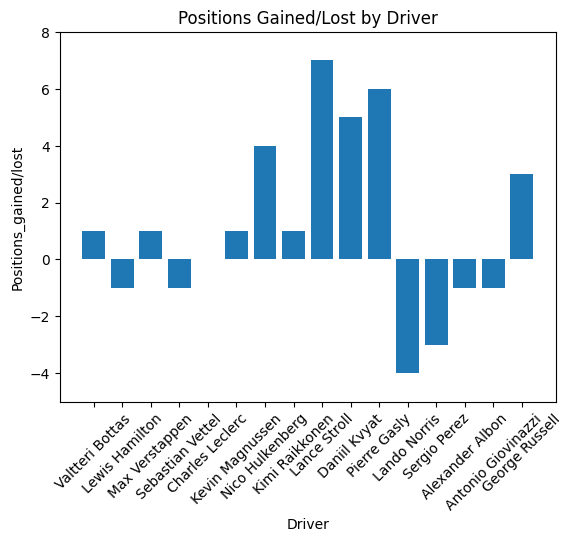

In [23]:
plt.bar(race_df['Driver'], race_df['Positions_Gained/Lost'])
plt.title("Positions Gained/Lost by Driver")
plt.xticks(rotation=45)
plt.ylabel("Positions_gained/lost")
plt.xlabel("Driver")
plt.ylim(-5,8)

### Sorting the Data

In [24]:
sorted_pit_times = race_df.sort_values(by='Total_Time_in_Pits')
sorted_pit_times

,Driver,Driver_ID,Position_Finished,Starting_Position,Number_of_Stops,Total_Time_in_Pits,Positions_Gained/Lost
2,Max Verstappen,25,3,4,1.0,21.157,1
10,Pierre Gasly,36,11,17,1.0,21.269,6
1,Lewis Hamilton,20,2,1,1.0,21.515,-1
6,Nico Hulkenberg,6,7,11,1.0,21.588,4
11,Lando Norris,49,12,8,1.0,21.627,-4
13,Alexander Albon,50,14,13,1.0,21.780,-1
3,Sebastian Vettel,19,4,3,1.0,21.995,-1
0,Valtteri Bottas,5,1,2,1.0,22.014,1
9,Daniil Kvyat,9,10,15,1.0,22.086,5
4,Charles Leclerc,34,5,5,1.0,22.306,0


### Scatter chart, analysing the coorelation between positions gained/lost and pitstop times
Upon this analysis, I found that there was not a strong correlation between the length of the pitstop, and the amount of positions gained/lost.

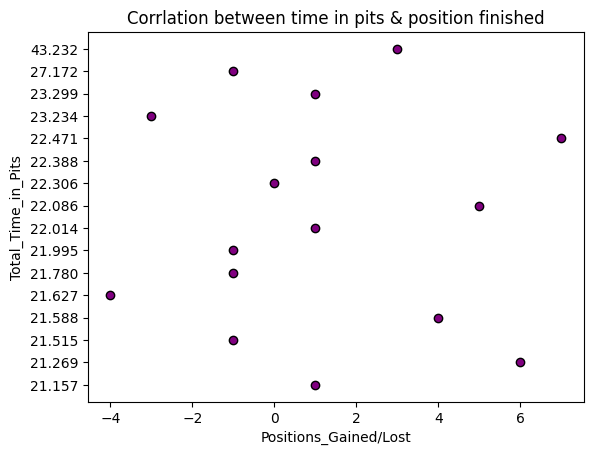

In [25]:
plt.scatter(sorted_pit_times['Positions_Gained/Lost'], sorted_pit_times['Total_Time_in_Pits'], marker="o", facecolors="purple", edgecolors="black")
plt.title("Corrlation between time in pits & position finished")
plt.xlabel("Positions_Gained/Lost")
plt.ylabel("Total_Time_in_Pits")
plt.show()

### Scatter Chart analyzing the coorelation between Starting Position and Finishing Position
When analyzing the scatter chart, it seems that there is a positive coorelation in the positions you gained, or lost. However, something that I noticed, is the lower down on the grid you start, the more likely you are to gain or loss position

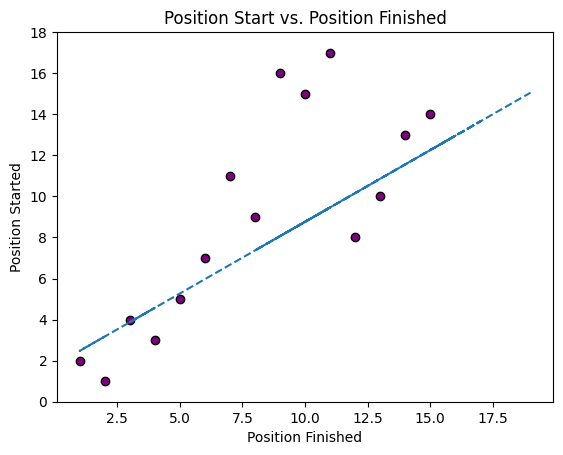

In [26]:
race_df.fillna(0,inplace=True)
x = race_df["Starting_Position"].values
y = race_df["Position_Finished"].values
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x, y)
d_fit = d_slope * x + d_int

plt.scatter(race_df['Position_Finished'], race_df['Starting_Position'], marker="o", facecolors="purple", edgecolors="black")
plt.plot(x,d_fit,"--")
plt.title("Position Start vs. Position Finished")
plt.xlabel("Position Finished")
plt.ylabel("Position Started")
plt.ylim(0,18)
plt.show()

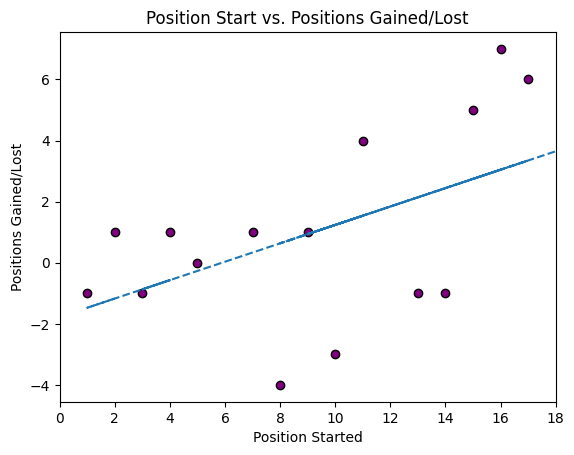

In [27]:
race_df.fillna(0,inplace=True)
x = race_df["Starting_Position"].values
y = race_df["Positions_Gained/Lost"].values
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x, y)
d_fit = d_slope * x + d_int

plt.scatter(x, y, marker="o", facecolors="purple", edgecolors="black")
plt.plot(x,d_fit,"--")
plt.title("Position Start vs. Positions Gained/Lost")
plt.xlabel("Position Started")
plt.ylabel("Positions Gained/Lost")
plt.xlim(0,18)
plt.show()

### Limitations of the Data
It is important to note that there were 3 DNFs (Did Not Finish) in this race. This may scew some of the data. More specifically, any data pertaining to positions gained/lost. Because of the DNFs, any driver that started the race behind those drivers, automatically gained 3 positions, and this may cause a bit of a scew in the data. You may have noticed that George Russel had a pitstop that was double the amount of time than the other drivers. (This was because all the other drivers only had 1 pistop, he had 2. This may have been caused by a car malfunction, or a minor crash that needed repairs). But you will see, that he actually gained 3 positions.

Another limitation that should be noted, is that this is an analysis of only 1 race. If we had acess to an API that allowed us to analyze multiple races at once, some of the data may be a little different when analyzing a larger sample size.

It is also important to note that Formula 1 is a sport that places a lot reliance on finances. Some teams have a larger budget than others. This means that the performance of the driver isn't fully in his control.